# Ortogonalização e o *Double Machine Learning* (DML)

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Ortogonalização
  * Aplicação do Procedimento de Ortogonalização no Python
* DML - Orthogonal/Double Machine Learning
  * Partially Linear Regression Models (PLR)
  * Aplicações do DML-Manual para identificar o ATE
  * Aplicações do DML com EconML e DoubleML para identificar o ATE
  * Outros Modelos de DML para identificar o ATE
    * Partially Linear IV Regression Models (PLIV)
    * Interactive regression models (IRM)
    * Interactive IV regression models (IIVM)
* Estimação do CATE com DML no Python


## Referências

**Principais:**
* Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W., & Robins, J. (2018). Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, Volume 21, Issue 1, 1 February 2018, Pages C1–C68, https://doi.org/10.1111/ectj.12097
  
* Microsoft EconML: https://econml.azurewebsites.net/
* UBER CausalML: https://causalml.readthedocs.io/en/latest/
* DoubleML for python: https://github.com/DoubleML/doubleml-for-py ou https://docs.doubleml.org/stable/index.html

**Complementares:**
* Chernozhukov, V. and C. Hansen (2004). The effects of 401 (k) participation on the wealth distribution: an instrumental quantile regression analysis. Review of Economics and Statistics 86, 735–51. 
* Chernozhukov, V., D. Chetverikov and K. Kato (2014). Gaussian approximation of suprema of empirical processes. Annals of Statistics 42, 1564–97. 
* Chernozhukov, V., J. Escanciano, H. Ichimura, W. Newey and J. Robins (2016). Locally robust semiparametric estimation. Preprint (arXiv:1608.00033). 
* Chernozhukov, V., C. Hansen and M. Spindler (2015a). Post-selection and post-regularization inference in linear models with very many controls and instruments. Americal Economic Review: Papers and Proceedings 105, 486–90. 
* Chernozhukov, V., C. Hansen and M. Spindler (2015b). Valid post-selection and post-regularization inference: an elementary, general approach. Annual Review of Economics 7, 649–88.
* Bach, P., Chernozhukov, V., Kurz, M. S., and Spindler, M. (2022), DoubleML - An Object-Oriented Implementation of Double Machine Learning in Python, Journal of Machine Learning Research, 23(53): 1-6, https://www.jmlr.org/papers/v23/21-0862.html.
* Bach, P., Chernozhukov, V., Kurz, M. S., Spindler, M. and Klaassen, S. (2024), DoubleML - An Object-Oriented Implementation of Double Machine Learning in R, Journal of Statistical Software, 108(3): 1-56, doi:10.18637/jss.v108.i03, arXiv:2103.09603.
* Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W. and Robins, J. (2018), Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, 21: C1-C68, doi:10.1111/ectj.12097.
* Lang, M., Binder, M., Richter, J., Schratz, P., Pfisterer, F., Coors, S., Au, Q., Casalicchio, G., Kotthoff, L. and Bischl, B. (2019), mlr3: A modern object-oriented machine learing framework in R. Journal of Open Source Software, doi:10.21105/joss.01903.
* Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, E. (2011), Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12: 2825–2830, https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html.


**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---

## Ortogonalização

A ideia de ortogonalização é baseada em um teorema elaborado por três econometristas em 1933, Ragnar Frisch, Frederick V. Waugh e Michael C. Lovell. Simplificando, afirma que você pode decompor qualquer modelo de regressão linear multivariável em três estágios ou modelos. 

Digamos que você tem uma matriz de covariáveis $X$, e voce particiona ela em duas partes, $X_{1}$ e $D$. 

* **Primeira Etapa**

Pegamos o primeiro conjunto de variáveis $X_{1}$ e fazemos uma regressão linear de $X_{1}$ em $Y$, onde $\theta_{1}$ é o vetor de parâmetros

$$ y_{i} = \theta_{0} + \theta_{1} X_{1i} + \epsilon_{i}$$

e guardamos os resíduos dessa regressão ($y^{*}$).

$$ y^{*}_{i} = y_{i} - \hat{y}_{i} = y_{i} - ( \hat{\theta}_{0} + \hat{\theta}_{1} X_{1i} )$$

* **Segunda Etapa**

Pegamos novamente o primeiro conjunto de características, mas agora executamos um modelo onde estimamos o segundo conjunto de características ($D$)

$$ D_{i} = \gamma_{0} + \gamma_{1} X_{1i} + e_{i}$$

Aqui, estamos usando o primeiro conjunto de recursos para prever o segundo conjunto de recursos. Por fim, consideramos também os resíduos desta segunda etapa.

$$ D_{i}^{*} = D_{i} - (\hat{\gamma_{0}} + \hat{\gamma_{1}} X_{1i})$$

* **Terceira etapa**

Por fim, pegamos os resíduos do primeiro e do segundo estágio e estimamos o seguinte modelo

$$ y_{i}^{*} = \alpha_{0} + \beta_{2} D_{i}^{*} + e_{i}$$


* **Teorema Frisch – Waugh – Lovell (FWL)**

O teorema FWL afirma que a estimativa do parâmetro $\hat{\beta}_{2}$ (ATE), estimado anteriormente, é equivalente ao que obtemos ao executar a regressão completa, com todas as covariáveis.

$$ y_{i} = \beta_{0} + \beta_{1} X_{1i} + \beta_{2} D_{i} + e_{i}$$


**Intuição do teorema FWL**

Sabemos que a regressão é um modelo muito especial. Cada um de seus parâmetros tem a interpretação de uma derivada parcial, quanto seria Y se X aumentasse em uma unidade, mantendo todos as outras covariáveis constantes. Sabemos também que se omitirmos variáveis ​​da regressão, teremos viés. Especificamente, viés variável omitido (ou viés de confusão). Ainda assim, Frisch-Waugh-Lovell está dizendo que posso dividir meu modelo de regressão em duas partes, nenhuma delas contendo o conjunto completo de recursos, e ainda assim obter a mesma estimativa que obteria executando a regressão inteira. 

O teorema fornece algumas dicas sobre o que a regressão linear está fazendo. Para obter o coeficiente de uma variável $X_{k}$, a regressão primeiro usa todas as outras variáveis ​​para prever $X_{k}$ e pega os resíduos. Isso “limpa” $X_{k}$ de qualquer influência dessas variáveis. Dessa forma, quando tentamos entender o impacto de $X_{k}$ sobre $Y$, estará livre de viés de variável omitida. Em segundo lugar, a regressão usa todas as outras variáveis ​​para prever $Y$ e pega os resíduos. Isso “limpa” $Y$ de qualquer influência dessas variáveis, reduzindo a variância de $Y$ para que seja mais fácil ver como $X_{k}$ afeta $Y$.

A regressão linear está estimando o impacto de $D$ sobre $y$ enquanto contabiliza $X_{1}$. Isso é importante para inferência causal. 

Assim, podemos construir um modelo que preveja um tratamento ($D$) usando as covariáveis $X$, um modelo que prevê o resultado $y$ usando as mesmas covariáveis, pegar os resíduos de ambos os modelos e executar um modelo que estime como o resíduo de $D$ afetam os resíduos de $y$. Este último modelo vai me dizer como $D$ afeta $y$ enquanto controla por $X$. 

Ou seja, **os dois primeiros modelos controlam as variáveis de confusão**. Eles estão **gerando dados que são praticamente aleatórios**. Lembre que é isso que estaria distorcendo seus dados. Então, usamos no modelo final para estimar o efeito causal de interesse **Average Treatment Effect - ATE**.

### Aplicação do Procedimento de Ortogonalização no Python

Vamos aplicar o procedimento de ortogonalização considerando um modelo de regressão linear simples. Vamos realizar a orgonalização supondo linearidade entre as variáveis para entender o conceito. Posteriormente, vamos aplicar o procedimento de ortogonalização em um modelo de machine learning. 

In [43]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore", message="\'force_all_finite\' was renamed to \'ensure_all_finite\'")


In [48]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

In [50]:
# Criar a variável de resultado
df['Y'] = df['bweight']

# Criar a variável 'Treated' com valor 1 se 'mbsmoke' for 'smoker', caso contrário 0
df['D'] = np.where(df['mbsmoke'] == 'smoker', 1, 0)

# Criar a variável 'casada' com valor 1 se 'mmarried' for 'married', caso contrário 0
df['casada'] = np.where(df['mmarried'] == 'married', 1, 0)

Para desviar este conjunto de dados, precisaremos de dois modelos. O primeiro modelo, vamos chamá-lo $M_{D}(X)$, prevê o tratamento (Se a gestante é fumante, no nosso caso) utilizando os confundidores. É um dos estágios que vimos acima, no teorema de Frisch–Waugh–Lovell.

Assim que tivermos este modelo, construiremos os resíduos

$$ D_{i}^{*} = D_{i} - M_{D}(X_{i})$$

In [56]:
m_D = smf.ols("D ~ 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['D_star'] = df['D'] - m_D.predict(df)

Você pode pensar neste resíduo como uma versão do tratamento que é imparcial ou, melhor ainda, que é impossível de prever a partir dos fatores de confusão $X$. Como os fatores de confusão já eram usados ​​para prever $D$, o resíduo é, por definição, imprevisível com com $X$. Outra maneira de dizer isso é que o viés foi explicado pelo modelo $M_{D}(X)$, produzindo $D_{i}^{*}$ que é tão bom quanto atribuído aleatoriamente. É claro que isso só funciona se tivermos em $X$ todos os fatores de confusão que causam ambos $D$ e $Y$.

Também podemos construir resíduos para o resultado.

$$ y_{i}^{*} = y_{i} - M_{y}(X_{i})$$


Este é outro estágio do teorema de Frisch – Waugh – Lovell. Isso não torna o conjunto menos tendencioso, mas facilita a estimativa do efeito, reduzindo a variância em $y$. Mais uma vez você pode pensar $y_{i}^{*}$ como uma versão de $y_{i}$ imprevisível de $X$ ou que teve todas as suas variações devido a $X$ explicadas. Pense nisso. Nós já usamos $X$ para prever $y$ com $M_{y}(X_{i})$. E $y_{i}^{*}$ é o erro dessa previsão. Então, por definição, não é possível prever isso a partir de $X$. Todas as informações em $X$ para prever $y$ já foram usadas. Se for esse o caso, a única coisa que resta para explicar $y_{i}^{*}$ é algo que não usamos usamos para construí-lo (não incluído em $X$), que é apenas o tratamento (novamente, assumindo que não há fatores de confusão não medidos).


In [57]:
m_y = smf.ols("Y ~  1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['y_star'] = df['Y'] - m_y.predict(df)

Por fim, aplicando o teorema para o segundo estágio,

$$ y_{i}^{*} = \alpha_{0} + \beta_{2} D_{i}^{*} + e_{i}$$


In [58]:
FWL1 = smf.ols("y_star ~ D_star", data=df).fit()
print(FWL1.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_star   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           1.91e-23
Time:                        20:12:08   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.172e+04
Df Residuals:                    4640   BIC:                         7.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.586e-11      8.041   1.97e-12      1.0

Podemos comparar o resultado com o OLS tradicional que considera diretamente todas as covariáveis:

In [59]:
ols = smf.ols("Y ~ D + 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     38.49
Date:                Wed, 27 Aug 2025   Prob (F-statistic):          5.80e-100
Time:                        20:12:10   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.175e+04
Df Residuals:                    4627   BIC:                         7.184e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2851.5203     54.983     51.861      0.0

Realmente o teorema de Frisch-Waugh-Lovell funciona mesmo.

Podemos concluir que depois de fazermos as duas transformações, a única coisa que resta para prever esses resíduos é o tratamento. 

Para resumir, ao prever o tratamento, construímos $D^{*}$ que funciona como uma versão imparcial do tratamento; ao prever o resultado, construímos $y^{*}$ que é uma versão do resultado que só pode ser explicada se usarmos o tratamento. Esses dados, onde substituímos por $y$ por $y^{*}$ e $D$ por $D^{*}$, são os dados desviados que queríamos. Podemos usá-lo para avaliar nosso modelo causal da mesma forma que fizemos anteriormente, usando dados aleatórios.

##  DML - Orthogonal/Double Machine Learning

No exemplo anterior vimos que o teorema de Frisch-Waugh-Lovell nos permite estimar o efeito causal de um tratamento $D$ sobre um resultado $Y$ enquanto controlamos por um conjunto de covariáveis $X$ para uma abordagem linear nos dois estágios.

No entanto, a abordagem linear pode ser muito restritiva. Em muitos casos, as relações entre as variáveis podem ser não lineares ou de alta dimensão. Nesses casos, podemos usar **algoritmos de aprendizado de máquina** para **controlar essas relações não lineares de alta dimensão**. 

Então podemos aplicar o "Double Machine Learning - DML" (Double/Debiased Machine Learning - DDML). Onde utilizamos ortogonalização com modelos de aprendizado de máquina para isolar o ATE ou CATE. O artigo de **Chernozhukov et al (2018)** :

<div style="text-align:center;">
    <img src="images\Chernozhucov.png"  alt="Imagem" style="width: 700px;"/>
</div>


Basicamente temos 4 abordagens:


* Partially Linear Regression Models (PLR)
* Partially Linear IV Regression Models (PLIV)
* Interactive regression models (IRM)
* Interactive IV regression models (IIVM)

### *Partially Linear Regression Models* (PLR)

Partindo do Partially Linear Regression Models (PLR), Chernozhukov et al (2018) propõem uma abordagem para estimar o CATE.

$$ Y = \theta(X)D + g_{y}(X) + \epsilon$$

* $\theta(X)$ é o efeito heterogêneo do tratamento (CATE).
* $g_{y}(X)$ é uma função de $X$ que captura a relação entre $Y$ e $X$ (ou seja, os fatores não relacionados ao tratamento).
* $E(\epsilon|D,X)=0$, e

$$ D = m_{D}(X) + \eta$$

* $m_{D}(X)$ é uma função de $X$ que captura a relação entre $D$ e $X$
* $E(\eta|X)=0$.

Isso significa que o efeito do tratamento ($\theta(X)$) é uma função de $X$, e não um valor constante. Além disso,  tanto o tratamento ($D$) quanto o resultado ($Y$) são funções de $X$.


Utilizando o DML, podemos estimar o CATE seguindo os seguintes passos:

Com base no procedimento de ortogonalização, os primeiros estágios do DML são:

$$ D^{*} = D - m_{0}(X)$$

e,

$$ Y^{*} = Y - g_{y}(X)$$

Posteriormente, teremos o segundo estágio do DML:

$$ Y^{*} = \alpha + \theta(X)D^{*} + \epsilon$$


Formalmente:

$$ \theta = argmin_{\theta} E[(Y^{*} - \theta (X) D^{*})^{2}] + \lambda R(\theta)$$

para algum termo de regularização fortemente convexo $R$, e $\lambda > 0$ é um parâmetro de regularização. O termo de regularização ajuda a evitar overfitting e é especialmente útil em modelos de alta dimensão, onde $\theta$ pode ser esparso (muitos coeficientes iguais a zero, em outras palavras, apenas algumas variáveis ou características têm influência significativa, enquanto o restante pode ser ignorado sem perda relevante de informação).
**Estimativas do CATE**

O ponto novo na nossa abordagem é que, agora, o $\theta(X)$ é o efeito heterogêneo do tratamento (CATE), e pode-se assumir que ele segue uma relação linear das covariáveis/recursos (a linearidade assumida para $\theta(X)$ é uma simplificação útil para interpretação e análise inicial), da seguinte forma:

$$ \theta(X) = X'\beta + \theta_{\text{intercept}}$$

* $X'$ é o vetor transposto das covariáveis.
* $\beta$ são os coeficientes que medem o efeito de cada covariável em $\theta(X)$.
* $\theta_{\text{intercept}}$ é o intercepto do modelo (cate_intercept).

### *Partially Linear IV Regression Models* (PLIV)

Ele é usado quando $D$ é endógeno, ou seja, correlacionado com o erro $\epsilon$.

$$ Y = \theta D + g(X) + \epsilon$$

$$ D = m(X,Z) + \eta$$

Com $Z$ sendo o conjunto das variáveis instrumentais. Repare que os instrumentos entram na primeira etapa, para "desenviesar" o tratamento $D$.

* No EconML: LinearIVDML
  * `from econml.iv.dml import LinearIVDML, SparseLinearIVDML, NonParamDMLIV`
* PLIV: assume relação parcialmente linear em $D$ ($Y = \theta D + g(X) + \epsilon$), mais parecido com 2SLS.

### *Interactive regression models* (IRM)

Nie & Wager (2017) propuseram o R-learner, também chamado em alguns textos de Interactive Regression Model (IRM). O modelo IRM **relaxa a suposição de linearidade** entre $D$ e $Y$. Ele permite que o efeito do tratamento $D$ seja não linear e interativo com $X$:

$$ Y = g(D,X) + U $$

$$ D = m(X) + V $$

Tem como objetivo relaxar a suposição de separabilidade entre $X$ e $D$, permitindo interações entre as covariáveis $X$ e o tratamento $D$.

Procedimento:
* Estima-se $E[D|X]$
* Calcula-se $E[Y|X,D=0]$ e $E[Y|X,D=1]$, permitindo modelar como $Y$ depende de $D$ e $X$ conjuntamente.
* Suposição de D binário, e relações não lineares e interativas podem existir entre $X$, $D$ e $Y$.

O pacote EconML não tem uma classe chamada RLearner ou IRM explícita. O DRLearner é exatamente a versão duplamente robusta do R-learner/IRM.

### *Interactive IV regression models* (IIVM)

Queremos o efeito médio local do tratamento (LATE): o efeito para os compliers, ou seja, indivíduos cuja decisão de tratamento é influenciada pela variação em Z.
Logo, aqui o resultado é o CATE entre os compliers, ou seja, um ***Conditional LATE (CLATE)***.

$$ Y = g(D,X) + U $$
$$ D = m(X,Z) + V $$
$$ Z = h(X) + E $$

objetivo é estimar o efeito médio local do tratamento (LATE) em contextos com endogeneidade e relações interativas entre $Z$, $X$, $D$ e $Y$.

Procedimento, Estima-se:
* $E[Y|X,Z=0]$, $E[Y|X,Z=1]$: Relação entre $Y$, $X$ e $Z$
* $E[D|X,Z=0]$, $E[D|X,Z=1]$: Relação entre $D$, $X$ e $Z$
* $E[Z|X]$: Relação entre $Z$ e $X$

Usa-se $Z$ para capturar interações entre as variáveis. Supõe-se relação não linear e iterativa entre $D$, $Z$, $X$ e $Y$. E $Z$ é um instrumento válido. Aplicação do LATE em situações de endogeneidade com heterogeneidade.

No EconML, a implementação do Interactive IV Model para tratamento binário e instrumento binário.
* `from econml.iv.nnet import IIVM`
* IIVM: não linear e interativo, permitindo que o efeito do tratamento varie com $X$ e que a relação de $D$ com $Z$ seja arbitrária.
* O alvo é o LATE, não o ATE.


### Aplicações do DML em Python

**EconML**

Vamos utilizar o pacote EconML para aplicar o DML - *Partially Linear Regression Models* (PLR), com modelos de ML - Gradient Boosting.

In [60]:
import pandas as pd
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [61]:
# Definir as variáveis
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
D = df['D']
y = df['Y']

In [62]:
# Converter variáveis categóricas em dummies (se necessário)
X = pd.get_dummies(X, drop_first=True)

In [63]:
# Definir os modelos de Machine Learning para (i) X em Y, e (ii) X em D
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_d = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Criar o estimador LinearDML
estimator = LinearDML(model_y=model_y,
                      model_t=model_d,
                      discrete_treatment=True,
                      cv=10,
                      random_state=123)

# Ajustar o modelo
estimator.fit(y, D, X=X)

ate_inf = estimator.ate_inference(X=X)
print(ate_inf.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -210.026      26.169 -8.026    0.0      -261.315      -158.736
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  120.872        -397.661         131.258
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     123.672       -450.408        161.909
------------------------------------------


No exemplo anterior eu havia calculado o efeito médio (ATE). 

Agora, vamos calcular o efeito heterogêneo do tratamento (CATE) para cada característica. Os resultados já estão disponíveis no objeto "estimator" realizado pelo pacote EconML.


In [64]:
print(estimator.summary())

                      Coefficient Results                       
          point_estimate  stderr zstat  pvalue ci_lower ci_upper
----------------------------------------------------------------
casada            28.828  55.792  0.517  0.605  -80.522  138.178
mage             -11.333   5.261 -2.154  0.031  -21.644   -1.022
medu              17.987  11.957  1.504  0.133   -5.449   41.422
fhisp             66.089 130.914  0.505  0.614 -190.497  322.676
mhisp            -85.452 161.644 -0.529  0.597 -402.269  231.364
foreign           348.68 153.471  2.272  0.023   47.882  649.478
alcohol          -30.274  91.655  -0.33  0.741 -209.915  149.368
deadkids          37.647  51.511  0.731  0.465  -63.312  138.606
nprenatal        -14.287   6.922 -2.064  0.039  -27.853   -0.721
mrace           -144.841 102.649 -1.411  0.158 -346.029   56.347
frace             48.413  99.684  0.486  0.627 -146.964  243.791
fage              -0.022   2.781 -0.008  0.994   -5.472    5.427
fedu              -0.491 

**Interpretação:**

* mage (idade da mãe):
  * point_estimate: -11.333 (p-value: 0.031)
  * Isso sugere que, para cada aumento de um ano na idade da mãe, o efeito negativo de fumar durante a gravidez no peso ao nascer diminui em 11.047 gramas (ou seja, o efeito se torna mais negativo).
  * Há evidência estatística de que a idade da mãe influencia o efeito de fumar durante a gravidez sobre o peso ao nascer.

* medu (educação materna):
  * point_estimate: 17.987 (p-value: 0.133)
  * Então, não há evidência estatística de que a educação materna mitigue o efeito negativo. A direção sugerida é positiva (maior educação → efeito menos negativo), mas sem significância.

* foreign (se a mãe é estrangeira):
  * point_estimate: 348.68 (p-value: 0.023 )
  * Sugere que mães estrangeiras apresentam um efeito tratamento condicional ~349 g maior do que mães não estrangeiras.
  * Interpretação: a nacionalidade estrangeira está associada a um efeito menos negativo do fumo.

* Outras variáveis: Algumas covariáveis não são estatisticamente significativas (pvalue > 0.05), indicando que não há evidência suficiente para afirmar que essas covariáveis influenciam o efeito do tratamento.

* CATE Intercept Results (Resultados do Intercepto do CATE):
  * cate_intercept = 57.711, p-valor = 0.728 (não significativo)
  * Esse é apenas o “baseline” quando todas as variáveis estão em zero — dificilmente tem interpretação substantiva.

O modelo sugere que mães mais velhas sofrem um impacto mais negativo do fumo no peso ao nascer, enquanto mães estrangeiras apresentam um impacto menos negativo. Para outras covariáveis, não há evidência robusta de heterogeneidade.

**Resumo:**

* O efeito do fumo não é constante; ele varia com características maternas.
* Idade materna (mage): significativa, aumenta a gravidade do efeito negativo.
* Educação materna (medu): direção sugere mitigação, mas não é estatisticamente significativa.
* Mãe estrangeira (foreign): significativa, associada a um efeito menos negativo.
* Demais covariáveis: não significativas.
* Intercepto: não interpretável isoladamente.

**Calcular o CATE para cada indivíduo ou perfil**

Para calcular o efeito tratamento condicional ($\theta(X)$) para um conjunto específico de covariáveis $X$, em:

$$ \hat{\theta}(X) = X'\hat{\beta} + \hat{\theta}_{\text{intercept}}$$

Por exemplo, suponha que você queira calcular o efeito para uma mãe com as seguintes características:

* Somente ser casada

In [ ]:
mask_cas = (df['casada'] == 1).to_numpy()
X_cas = X.loc[mask_cas, :]

In [67]:
X_cas.describe()

,casada,mage,medu,fhisp,mhisp,foreign,alcohol,deadkids,nprenatal,mrace,frace,fage,fedu
count,3248.0,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000,3248.000000
mean,1.0,28.145628,13.275554,0.019089,0.017857,0.056650,0.022167,0.255234,11.378387,0.935037,0.932266,29.991687,13.397167
std,0.0,4.830994,2.369370,0.136858,0.132453,0.231209,0.147251,0.436060,3.119722,0.246499,0.251328,6.552594,2.481323
min,1.0,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,26.000000,12.000000
50%,1.0,28.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.000000,30.000000,12.000000
75%,1.0,31.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,1.000000,33.000000,16.000000
max,1.0,45.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,60.000000,17.000000


In [68]:
res_cate_casadas = estimator.ate_inference(X=X_cas)
print(res_cate_casadas.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -225.354      34.106 -6.608    0.0        -292.2      -158.508
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  115.066        -393.904         147.968
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     120.014       -442.965        159.017
------------------------------------------


Vamos criar outra variável contendo as características para estimar o CATE:

In [69]:
# Definir o subgrupo
mask_sub = (
    (df['casada'] == 1) &
    (df['mage'].between(25, 27)) &
    (df['medu'].between(10, 12)) &
    (df['fhisp'] == 0) &
    (df['mhisp'] == 0) &
    (df['foreign'] == 0) &
    (df['alcohol'] == 0) &
    (df['deadkids'] == 0) &
    (df['nprenatal'].between(5, 10)) &
    (df['mrace'] == 0) &
    (df['frace'] == 0) &
    (df['fage'].between(20, 27)) &
    (df['fedu'].between(8, 12))
)

X_sub = X.loc[mask_sub, :]

In [70]:
res_sub = estimator.ate_inference(X=X_sub.values)
print(res_sub.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -128.829      83.341 -1.546  0.122      -292.175        34.517
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    1.477        -130.232        -127.426
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      83.354       -292.407         34.749
------------------------------------------


Para o perfil de gestante especificada, fumar durante a gravidez está associado a uma redução média de aproximadamente 128.83 gramas no peso ao nascer do bebê. Logo, há evidência estatística significativa de que fumar durante a gravidez está associado a uma redução substancial no peso ao nascer do bebê.

## Classes do DML no *EconML*

### LinearDML
- **Modelo final:** regressão linear simples, sem penalização.  
- **Uso típico:** quando $X$ tem baixa dimensão e você acredita que o CATE é aproximadamente linear em $X$.  
- **Inferência:** assintoticamente normal, permite intervalos de confiança com base no CLT. Também suporta bootstrap (`inference='bootstrap'`).  
- **Referência:** Chernozhukov et al. (2016).  

$$
\tau(X) = X^\top \beta
$$


### SparseLinearDML
- **Modelo final:** regressão linear com regularização L1 (Debiased Lasso).  
- **Uso típico:** quando $X$ é de **alta dimensão** (muitas covariáveis, possivelmente $p > n$).  
- **Vantagem:** consegue selecionar variáveis relevantes automaticamente, corrigindo o viés da penalização via “debiased Lasso”.  
- **Inferência:** propriedades de normalidade assintótica do DebiasedLasso permitem ICs válidos.  
- **Referências:** Chernozhukov et al. (2017, 2018).  

 
$$
\tau(X) = X^\top \beta, \quad \beta \text{ esparso}
$$


### KernelDML
- **Modelo final:** regressão de kernel ridge no espaço RKHS.  
- **Ideia:** não restringe o CATE a ser linear. Usa aproximação via **Fourier random features** de um kernel RBF.  
- **Uso típico:** quando você acredita que o CATE é **não linear em \(X\)** e quer flexibilidade, mas ainda dentro da estrutura de kernel.  
- **Modelo final:** após mapear $X$ para features via kernel RBF, ajusta um ElasticNet regularizado.  
- **Referência:** Nie & Wager (2017), literatura de kernel methods.  

$$
\tau(X) \in \mathcal{H}_\kappa \quad \text{(um RKHS gerado por kernel RBF)}
$$


#### Resumo prático

- **LinearDML:** bom para poucos $X$, interpretação direta dos coeficientes.  
- **SparseLinearDML:** bom para muitos $X$, seleciona covariáveis relevantes.  
- **KernelDML:** bom para capturar **não linearidades** do efeito heterogêneo usando kernel RBF.  




### NonParamDML
- **Modelo final:** não faz nenhuma suposição paramétrica sobre o modelo de efeito.  
- **Restrições:** só se aplica quando o tratamento é **binário** ou **unidimensional contínuo**.  
- **Comentário:**  
É a opção mais “agnóstica”. Você não impõe estrutura linear ou de kernel; o modelo final é aprendido de forma totalmente não paramétrica.


### CausalForestDML
- **Modelo final:** floresta causal (Wager, 2018; Athey, 2019).  
- **Inferência:** oferece intervalos de confiança via *Bootstrap-of-Little-Bags*.  
- **Comentário:**  
Não exige caracterização explícita da heterogeneidade. Aprende diretamente o CATE de forma **não linear** e flexível. Bom quando a relação entre \(X\) e o efeito é muito complexa.  


### Modelos mais flexíveis (Não-Lineares)

Quando a heterogeneidade do efeito **não tem forma linear**, os modelos lineares deixam de ser válidos.  
- O **SparseLinearDML** lida com esse cenário por meio do Lasso desviado, útil em alta dimensão.  
- O **CausalForestDML** vai além: **não precisa de caracterização explícita**, pois aprende a heterogeneidade diretamente com árvores/ florestas.  

**Comentário:**  
Nesses modelos mais flexíveis, **não conseguimos interpretar os coeficientes diretamente**.  
- É possível estimar o **ATE** (efeito médio).  
- Também é possível obter o efeito para **um indivíduo específico** (ou um subgrupo específico), mas não há interpretação simples dos parâmetros como no caso linear.


### Resumindo
- **LinearDML:** bom para poucos $X$, interpretação direta dos coeficientes.  
- **SparseLinearDML:** bom para muitos $X$, seleciona covariáveis relevantes.  
- **KernelDML:** captura não linearidades via kernel RBF.  
- **NonParamDML:** não faz nenhuma suposição paramétrica, mas só para $D$ binário ou contínuo unidimensional.  
- **CausalForestDML:** aprende heterogeneidade complexa automaticamente via florestas, com ICs baseados em *Bootstrap-of-Little-Bags*.  


### Aplicação de Modelos Não-Lineares


***CausalForestDML - Forest Double Machine Learning***

Causal Forest é uma extensão dos Random Forests tradicionalmente usados para previsão, mas projetado para estimar efeitos causais — especialmente efeitos heterogêneos (CATE).

* Ele foi proposto por Athey & Wager (2018) no paper: 
  * Athey, S., & Wager, S. (2018). Estimation and Inference of Heterogeneous Treatment Effects using Random Forests.

In [72]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [75]:
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
T = df['D']
Y = df['Y']

In [76]:
# Modelos para outcome e tratamento
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Causal Forest como modelo final
cf_dml = CausalForestDML(model_y=model_y,
                         model_t=model_t,
                         discrete_treatment=True,
                         n_estimators=500,
                         min_samples_leaf=5,
                         max_depth=10,
                         random_state=123)

cf_dml.fit(Y, T, X=X, cache_values=True)

cf_dml.ate(X)


In [77]:
print(cf_dml.summary())

Population summary of CATE predictions on Training Data
               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -212.974     112.278 -1.897  0.058      -433.035         7.086
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  105.745        -410.191          44.477
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     154.235       -527.147        118.533
        Doubly Robust ATE on Training Data Results       
    point_estimate stderr zstat  pvalue ci_lower ci_upper
---------------------------------------------------------
ATE       -207.967 29.093 -7.148    0.0 -264.989 -150.946
    Doubly Robust ATT(T=0) on Training Data Results     
    point_estimate stderr zstat pvalue ci_lower ci_uppe

* Com base exclusivamente na média dos CATEs estimados, o efeito médio estimado do tabagismo é –213g
* Doubly Robust ATE (baseado em influência orthogonal)
  * Essa é a estimativa mais confiável do ATE, pois vem do método de influência com ortogonalização — ou seja, é onde o estimador é realmente duplamente robusto.
* ATT(T=0): efeito médio se os não fumantes tivessem fumado → –216 g, altamente significativo
* ATT(T=1): efeito médio entre os que fumaram → –173 g, não significativo (alta variância)

***Quais as variáveis mais importantes para o modelo?***

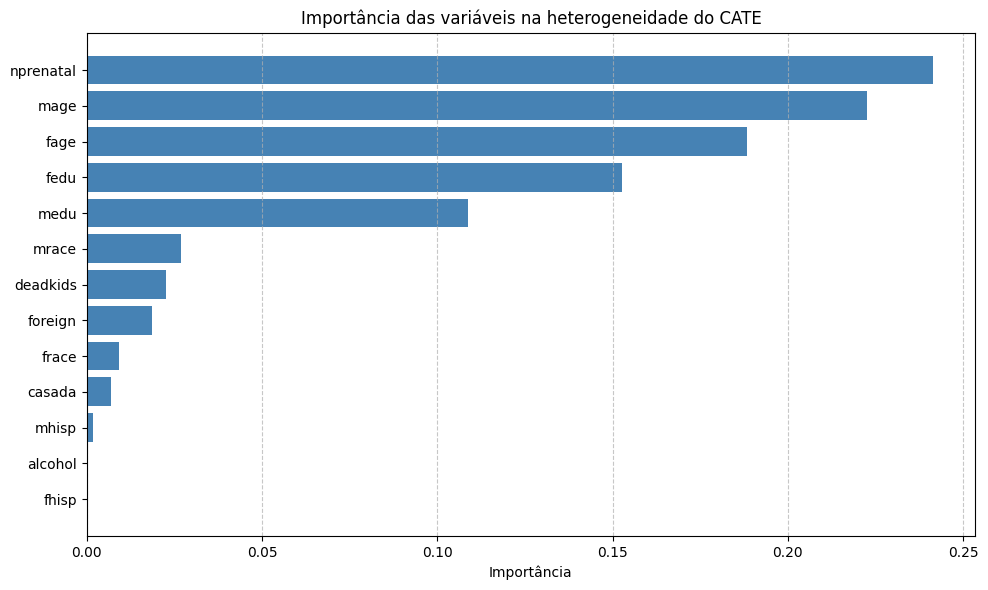

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obter importâncias e nomes das variáveis
importances = cf_dml.feature_importances_
features = np.array(X.columns)

# Ordenar do maior para o menor
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = features[sorted_idx]

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='steelblue')
plt.xlabel('Importância')
plt.title('Importância das variáveis na heterogeneidade do CATE')
plt.gca().invert_yaxis()  # Coloca a mais importante no topo
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* o modelo acredita que essa variável sozinha contribui com 1/4 da explicação da heterogeneidade dos efeitos;
* Ela é usada frequentemente nos splits das árvores da floresta causal para distinguir subgrupos com diferentes efeitos do tratamento.

Agora vamos verificar os CATES variando a variável `nprenatal` e mantendo as demais variáveis fixas.

In [94]:
# calcula a média das covariáveis
x_mean = X.mean().to_dict()

# cria uma linha com os valores médios
x_point = pd.DataFrame([x_mean])

# substitui pelas variáveis de interesse
x_point['casada'] = 1
x_point['mage'] = 26

# calcula o CATE
cate_point = cf_dml.effect(x_point)
print(cate_point)


[-229.54257157]


In [95]:
print(x_point)

   casada  mage       medu     fhisp     mhisp   foreign   alcohol  deadkids  \
0       1    26  12.689573  0.037053  0.034037  0.053425  0.032314  0.259371   

   nprenatal     mrace     frace       fage       fedu  
0  10.758078  0.840586  0.813658  27.267126  12.307195  


In [98]:
cate_point_infer = cf_dml.ate_inference(x_point)
print(cate_point_infer)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
  -229.543      52.645 -4.36    0.0      -332.724      -126.361
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
      0.0        -229.543        -229.543
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      52.645       -332.724       -126.361
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


***Tratamento Contínuo***

Vamos alterar o tratamento para mage (idade da mãe). E vamos avaliar o efeito "contínuo" da idade da mãe sobre o peso dos bebes ao nascer (y). 


In [ ]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor

Y = df['Y'].astype(float)       # peso ao nascer
T = df['mage'].astype(float)    # tratamento contínuo: idade da mãe

# Controles (tudo menos mage)
X_raw = df[['casada','medu','fhisp','mhisp','foreign','alcohol',
            'deadkids','nprenatal','mrace','frace','fage','fedu']]
X = pd.get_dummies(X_raw, drop_first=True)

# Modelos de primeira etapa
model_y = GradientBoostingRegressor(n_estimators=200, random_state=123)
model_t = GradientBoostingRegressor(n_estimators=200, random_state=123)

cf = CausalForestDML(model_y=model_y,
                     model_t=model_t,
                     n_estimators=500,
                     min_samples_leaf=5,
                     max_depth=10,
                     random_state=123)

cf.fit(Y, T, X=X)

In [ ]:
# Derivada local dY/d(mage) em cada ponto
cme = cf.const_marginal_effect(X)
print("CME médio:", cme.mean())

CME médio: 2.850346727815087


In [121]:
cme_inf = cf.const_marginal_effect_inference(X)
cme_frame = cme_inf.summary_frame()
print(cme_frame)

      point_estimate  stderr  zstat  pvalue  ci_lower  ci_upper
X                                                              
0             10.263  10.854  0.945   0.344   -11.012    31.537
1             -6.881  12.031 -0.572   0.567   -30.460    16.699
2              8.030   7.024  1.143   0.253    -5.738    21.797
3             12.754   4.735  2.694   0.007     3.474    22.035
4             -2.586   9.665 -0.268   0.789   -21.529    16.357
...              ...     ...    ...     ...       ...       ...
4637           3.432   7.118  0.482   0.630   -10.519    17.383
4638           6.634   9.880  0.671   0.502   -12.731    26.000
4639         -22.147  18.817 -1.177   0.239   -59.028    14.735
4640          -6.210   4.367 -1.422   0.155   -14.768     2.349
4641          -6.759   5.838 -1.158   0.247   -18.201     4.683

[4642 rows x 6 columns]


CausalForestDML com tratamento contínuo (mage) e já obteve a derivada local (o CME — conditional marginal effect) com p-valores e intervalos de confiança.

In [118]:
xbar = X.mean().to_frame().T
cme_xbar = cf.const_marginal_effect_inference(xbar).summary_frame()
print(cme_xbar)


   point_estimate  stderr  zstat  pvalue  ci_lower  ci_upper
X                                                           
0           7.088   6.665  1.063   0.288    -5.976    20.152


invalid value encountered in divide


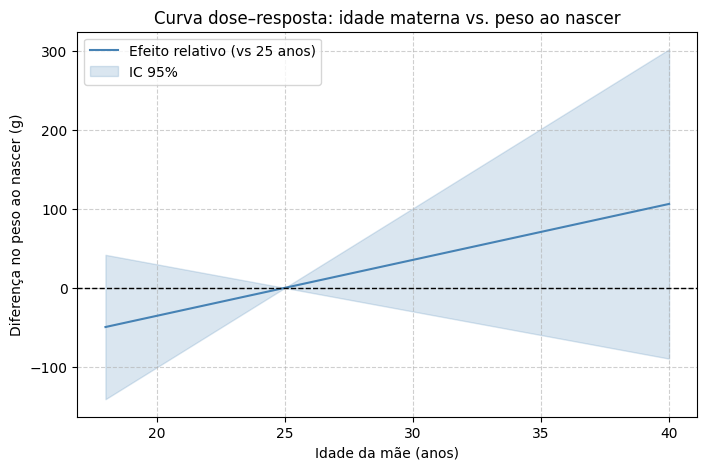

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# 1) baseline
T0 = 25.0

# 2) grade de idades
grid = np.arange(18, 41, 1)
T0 = 25.0
xbar = X.mean().to_frame().T

effects, ci_lower, ci_upper = [], [], []
for t1 in grid:
    inf = cf.effect_inference(xbar, T0=T0, T1=t1)
    sf = inf.summary_frame()
    effects.append(sf["point_estimate"].iloc[0])
    ci_lower.append(sf["ci_lower"].iloc[0])
    ci_upper.append(sf["ci_upper"].iloc[0])


# 5) plotar
plt.figure(figsize=(8,5))
plt.plot(grid, effects, label="Efeito relativo (vs 25 anos)", color="steelblue")
plt.fill_between(grid, ci_lower, ci_upper, color="steelblue", alpha=0.2, label="IC 95%")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Idade da mãe (anos)")
plt.ylabel("Diferença no peso ao nascer (g)")
plt.title("Curva dose–resposta: idade materna vs. peso ao nascer")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [112]:
def dose_response_avg(T0, T1):
    eff = cf.effect(X, T0=T0, T1=T1)
    return eff.mean()

avg_effects = [dose_response_avg(T0, t1) for t1 in grid]


In [104]:
# Diferença entre ter 30 vs 25 anos, no X médio
xbar = X.mean().to_frame().T
eff_30vs25 = cf.effect(xbar, T0=25, T1=30)
print("Δ peso (30 vs 25 anos):", eff_30vs25)


Δ peso (30 vs 25 anos): [35.44039808]


In [105]:
bins = pd.cut(df['mage'], [15,20,25,30,35,40])
for g in bins.unique():
    idx = bins == g
    if idx.sum()>0:
        print(g, cf.ate_inference(X.loc[idx, :]).summary())


(20.0, 25.0]                Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.311      13.084 -0.024  0.981       -25.955        25.333
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
   11.077         -23.572           20.04
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      17.143        -35.987         33.173
------------------------------------------

Note: The stderr_mean is a conservative upper bound.
(15.0, 20.0]                Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -2.949      15.037 -0.196  0.845       -32.421        26.524
      Distributio

In [101]:
# (a) Efeito marginal por indivíduo (heterogeneidade)
cme = np.ravel(est.const_marginal_effect(X))  # dY/d(mage) para cada linha de X
print("CME médio (g por ano):", cme.mean(), " | DP:", cme.std())

# Inferência (IC) para o CME por indivíduo
cme_inf = est.const_marginal_effect_inference(X)
print(cme_inf.summary())   # tabela grande (uma linha por obs.)

# (b) Efeito marginal no X médio (perfil representativo)
xbar = X.mean().to_frame().T
cme_xbar = float(np.ravel(est.const_marginal_effect(xbar)))
ci_lo, ci_hi = est.const_marginal_effect_interval(xbar)
print("CME no X médio:", cme_xbar, " | IC95%:", float(ci_lo[0]), float(ci_hi[0]))


CME médio (g por ano): 2.437496189458869  | DP: 7.742900282410255


AttributeError: 'NormalInferenceResults' object has no attribute 'summary'

1. Efeitos médios
* ate(X) → retorna o ATE no conjunto X.
* ate_inference(X) → retorna o ATE + ICs (resumidos em tabela).
* att(X) e att_inference(X) → efeito médio no grupo tratado.

2. Efeitos individuais e subgrupos
* effect(X) → CATE estimado para cada indivíduo de X.
* effect_inference(X) → o mesmo, mas com erros-padrão e ICs.
* Isso é o que você já rodou com cate_inf.summary_frame().

3. Importância das variáveis
* feature_importances_ → importância das variáveis na heterogeneidade do CATE.
* Isso responde: quem explica melhor a variação nos efeitos do tratamento?
* Diferente do Gini/importância em Random Forest padrão, aqui é voltado para heterogeneidade causal.

4. Heterogeneidade
* const_marginal_effect(X) → retorna o efeito marginal do tratamento em cada ponto de X.
* Essencialmente o mesmo que effect(X) para D binário.

5. Inferência completa
* summary() → imprime um sumário da população, incluindo ATE, ATT e incertezas.
* effect_interval(X, alpha=0.05) → retorna diretamente os intervalos de confiança dos CATEs.
* score_ → valor do critério de honestidade da floresta, útil como diagnóstico interno.

6. Estrutura da floresta (avançado)
* causal_forest_model (atributo interno) → é o objeto da floresta causal do econml.
* Permite inspecionar árvores individuais, parâmetros de splitting etc.
* causal_forest_model.oob_prediction_variance() → variância fora-da-amostra (OOB) das predições.



***GATE***

É possivel criarmos grupos de tratamento condicional (GATE - Group Average Treatment Effect), os quais podem ser úteis para identificar subgrupos com efeitos semelhantes.

O GATE pode ser útil para o pesquisador, principalmente na hora de formular políticas públicas, pois permite entender como diferentes grupos da população podem reagir de maneira distinta a uma intervenção.

**Como podemos avaliar o desempenho do modelo CATE?**

Cada uma das classes DML tem um atributo score_ depois de serem ajustadas. Então, é possível acessar esse atributo e comparar o desempenho em diferentes parâmetros de modelagem (quanto menor a pontuação, melhor):

## Considerações Finais

Vejamos um resumo do que foi visto.

* O principal objetivo do DML é ajustar e remover a variável de confusão de forma que a variável de interesse (tratamento) e o resultado fiquem "ortogonais" ou "independentes".
* DML combina métodos de aprendizado de máquina com técnicas econométricas para estimar efeitos causais.
* A técnica geralmente envolve a aplicação de aprendizado de máquina para prever tanto o tratamento quanto o resultado usando as variáveis observáveis de confusão, e então os resíduos dessas previsões são utilizados em um segundo estágio para estimar o efeito causal.
  * Primeiro Estágio: Aplicar modelos de aprendizado de máquina para prever a variável de tratamento e o resultado.
  * Segundo Estágio: Utilizar os resíduos dessas previsões em um modelo de regressão para estimar o efeito causal.


In [ ]:
from econml.orf import OrthogonalRandomForest
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Modelos auxiliares para outcome e tratamento
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Estimador Orthogonal Random Forest
orf = OrthogonalRandomForest(
    n_trees=500,            # Número de árvores na floresta
    min_leaf_size=5,        # Número mínimo de observações por folha
    max_depth=10,           # Profundidade máxima da árvore
    subsample_ratio=0.7,    # Proporção de amostra usada em cada árvore
    model_Y=model_y,        # Modelo para prever o outcome
    model_T=model_t,        # Modelo para prever o tratamento
    discrete_treatment=True, # Tratamento binário
    random_state=123
)

# Ajuste (fit)
orf.fit(Y, T, X=X, W=None)

# Predição do CATE (theta(x))
cate_pred = orf.effect(X)

# Estimação do ATE
ate_pred = cate_pred.mean()

print(f"Estimativa do ATE via ORF: {ate_pred}")



* Chernozhukov et al (2016) considera o caso em que $\theta(X)$ é uma constante (ATE), ou uma função linear de $X$ (CATE) de baixa dimensão.
* Nie (2017) cai em um Espaço de Hilbert do Kernel Reprodutor (RKHS).
* Chernozhukov et al (2018) consideram o caso de um espaço linear esparso de alta dimensão, onde $\theta(X) = <\theta, \phi(X)>$ para algum mapeamento de características de alta dimensão conhecido e onde $\theta$ tem muito poucas entradas diferentes de zero (esparsas)
* Athey (2019), entre outros resultados, considera o caso em que $\theta(X)$ é uma função lipschitz não paramétrica e usa modelos de floresta aleatória para ajustar a função. Esse métodos permite maior flexibilidade para modelar $\theta(X)$ sem assumir linearidade.
* Foster (2019) permite modelos arbitrários $\theta(X)$ e fornecer resultados com base em medidas de complexidade de amostra do espaço do modelo (por exemplo, complexidade de Rademacher, entropia métrica). Esse métodos permite maior flexibilidade para modelar $\theta(X)$ sem assumir linearidade.

A principal vantagem do DML é que se fizermos suposições paramétricas sobre $\theta(X)$, então se obtém taxas de estimativa rápidas e, para muitos casos de estimadores de estágio final, também normalidade assintótica na estimativa do segundo estágio $\hat{\theta}$.
